In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',50)

In [4]:
#Importing the dataset
df = pd.read_csv('Data.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [15]:
for i in df.columns:
    print(str(i).upper())
    print()
    print(df[i].unique())
    print('***********'*5)

DESTINATION

['No Urgent Place' 'Home' 'Work']
*******************************************************
PASSANGER

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
*******************************************************
WEATHER

['Sunny' 'Rainy' 'Snowy']
*******************************************************
TEMPERATURE

[55 80 30]
*******************************************************
COUPON

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
*******************************************************
EXPIRATION

['1d' '2h']
*******************************************************
GENDER

['Female' 'Male']
*******************************************************
AGE

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
*******************************************************
MARITALSTATUS

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
*******************************************************
HAS_CHILDREN

[1 0]
*********************************

In [5]:
df.shape

(12684, 25)

In [22]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Percentage of data missing
(df.isnull().sum()/df.isnull().sum().sum())*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     94.061331
Bar                      0.800299
CoffeeHouse              1.623037
CarryAway                1.129394
RestaurantLessThan20     0.972326
Restaurant20To50         1.413613
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [23]:
#Since car have 94% data missing we will REMOVE that column
# And Handle other null columns value

In [6]:
print(df.shape)
df.drop(columns = 'car',inplace = True)
print(df.shape)

(12684, 25)
(12684, 24)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  Bar                   12577 non-null  object
 14  CoffeeHouse           12467 non-null  object
 15  CarryAway             12533 non-null

In [ ]:
#Columns with Null values ------ Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 

In [7]:
col = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [7]:
for i in col:
    print(i)
    print(df[i].value_counts())
    print()
    print('*********'*5)

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

*********************************************
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

*********************************************
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

*********************************************
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

*********************************************
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

*********************************************


In [32]:
#Since, these are the objects, we can handle null values by replacing hem with the mode(Most frequent element)

In [8]:
col

['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

In [8]:
df1 = df.copy()
df['Bar'] = df1['Bar'].fillna(df1['Bar'].mode()[0])
df['CoffeeHouse'] = df1['CoffeeHouse'].fillna(df1['CoffeeHouse'].mode()[0])
df['CarryAway'] = df1['CarryAway'].fillna(df1['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df1['RestaurantLessThan20'].fillna(df1['RestaurantLessThan20'].mode()[0])
df['Restaurant20To50'] = df1['Restaurant20To50'].fillna(df1['Restaurant20To50'].mode()[0])


In [9]:
df.isnull().sum().sum()

0

In [10]:
#Now that null values are handled, lets check if there is any duplicate values

In [11]:
df.duplicated().sum()

291

In [54]:
df[df.duplicated()]

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
30,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
96,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3,less1,1~3,less1,1~3,1,0,0,0,1,1
162,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,26,Single,0,Some college - no degree,Healthcare Support,$37500 - $49999,gt8,gt8,gt8,gt8,gt8,1,0,0,0,1,0
184,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,26,Single,1,Associates degree,Healthcare Practitioners & Technical,$25000 - $37499,never,1~3,4~8,1~3,less1,1,0,0,0,1,1
201,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Male,21,Single,0,Some college - no degree,Sales & Related,$100000 or More,less1,never,gt8,1~3,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,36,Divorced,1,Some college - no degree,Office & Administrative Support,$25000 - $37499,never,gt8,4~8,4~8,less1,1,0,0,0,1,1
10515,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,50plus,Married partner,1,Bachelors degree,Unemployed,$87500 - $99999,never,4~8,1~3,4~8,1~3,1,0,0,0,1,1
10592,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$50000 - $62499,never,never,less1,less1,less1,1,0,0,0,1,0
10670,No Urgent Place,Kid(s),Sunny,80,Coffee House,1d,Female,26,Married partner,1,Some college - no degree,Unemployed,$25000 - $37499,never,never,1~3,less1,never,1,0,0,0,1,0


In [55]:
#Lets remove these duplicated values

In [12]:
print(df.shape)
df = df[~(df.duplicated())]
print(df.shape)

(12684, 24)
(12393, 24)


## Encoding

In [13]:
df.select_dtypes('object').columns

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [66]:
for i in df.select_dtypes('object').columns:
    print(i)
    print()
    print(df[i].unique())
    print('********'*5)

destination

['No Urgent Place' 'Home' 'Work']
****************************************
passanger

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
****************************************
weather

['Sunny' 'Rainy' 'Snowy']
****************************************
coupon

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
****************************************
expiration

['1d' '2h']
****************************************
gender

['Female' 'Male']
****************************************
age

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
****************************************
maritalStatus

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
****************************************
education

['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
****************************************
occupation

['Unemployed' 'Architecture & Engine

In [67]:
for i in df.select_dtypes('object').columns:
    print(i)
    print(df[i].value_counts())
    print()
    print('*********'*5)

destination
No Urgent Place    6118
Home               3161
Work               3114
Name: destination, dtype: int64

*********************************************
passanger
Alone        7178
Friend(s)    3166
Partner      1068
Kid(s)        981
Name: passanger, dtype: int64

*********************************************
weather
Sunny    9862
Snowy    1329
Rainy    1202
Name: weather, dtype: int64

*********************************************
coupon
Coffee House             3913
Restaurant(<20)          2708
Carry out & Take away    2275
Bar                      2010
Restaurant(20-50)        1487
Name: coupon, dtype: int64

*********************************************
expiration
1d    6938
2h    5455
Name: expiration, dtype: int64

*********************************************
gender
Female    6355
Male      6038
Name: gender, dtype: int64

*********************************************
age
21         2598
26         2486
31         1984
50plus     1756
36         1293
41         1079


### Encoding


In [15]:
# Convert income into int

In [ ]:
# passanger - Alone, with someone
# weather - Sunny, not sunny
# 3 Broad Categories -- partner, single, divorced/windowed
# education - Club --- High School Graduate and Some High School, RestaurantLessThan20, Restaurant20To50

In [ ]:
#One-hot encoder - destination,coupon, occupation
#Label encoder - expiration,gender
#Ordinal Encoder - age, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

In [ ]:
# occupation

# Grouping "Architecture & Engineering," "Computer & Mathematical," and "Life Physical Social Science" together as 
#"STEM Occupations" since they are related to science, technology, engineering, and mathematics.

#Grouping "Healthcare Support" and "Healthcare Practitioners & Technical" as "Healthcare Occupations" since they both relate 
#to the healthcare industry.

#Grouping "Sales & Related" and "Business & Financial" together as "Business and Sales Occupations" as they are both 
#related to sales and business activities.


#Grouping "Food Preparation & Serving Related" and "Personal Care & Service" together as "Service Industry" since they 
#both involve providing services to customers.

In [16]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0


In [18]:
df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [14]:
df1 = df.copy()
# Converting income into int
def income(x):
    if x == "$37500 - $49999":
        return (37500 + 49999)/2
    elif x == '$62500 - $74999':
        return (62500 + 74999)/2
    elif x == '$12500 - $24999':
        return (12500 + 24999)/2
    elif x == '$75000 - $87499':
        return (75000 + 87499)/2
    elif x == '$50000 - $62499':
        return (50000 + 62499)/2
    elif x == '$25000 - $37499':
        return (25000 + 37499)/2
    elif x == '$100000 or More':
        return 100000
    elif x == '$87500 - $99999':
        return (87500 + 99999)/2
    elif x == 'Less than $12500':
        return 12500
    
df1['income'] = df1['income'].apply(income)

In [15]:
df1['income'].unique()

array([ 43749.5,  68749.5,  18749.5,  81249.5,  56249.5,  31249.5,
       100000. ,  93749.5,  12500. ])

In [ ]:
# Converting passanger - Alone or  with someone
# since these are the broad categories we are focusing on

In [16]:
df1['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [17]:
def passanger(x):
    if x == 'Friend(s)'or x == 'Kid(s)'or x == 'Partner':
        return "accompanied"
    else:
        return 'alone'
    
df1['passanger'] = df1['passanger'].apply(passanger)

In [18]:
df1['passanger'].unique()

array(['alone', 'accompanied'], dtype=object)

In [ ]:
# Converting weather - Sunny, not sunny
# since these are the broad categories we are focusing on

In [19]:
df1['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [20]:
def weather(x):
    if x == 'Rainy'or x == 'Snowy':
        return "notSunny"
    else:
        return 'sunny'
    
df1['weather'] = df1['weather'].apply(weather)

In [21]:
df1['weather'].unique()

array(['sunny', 'notSunny'], dtype=object)

In [39]:
#df1['weather'].value_counts()

In [ ]:
# 3 Broad Categories -- partner, single, divorced/windowed

In [22]:
df1['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [23]:
df1['maritalStatus'].value_counts()

Married partner      4994
Single               4610
Unmarried partner    2155
Divorced              505
Widowed               129
Name: maritalStatus, dtype: int64

In [24]:
def maritalStatus(x):
    if x == 'Unmarried partner'or x == 'Married partner':
        return "partner"
    elif x == 'Divorced'or x == 'Widowed':
        return "divorced/windowed"
    else:
        return 'single'
    
df1['maritalStatus'] = df1['maritalStatus'].apply(maritalStatus)

In [25]:
df1['maritalStatus'].value_counts()

partner              7149
single               4610
divorced/windowed     634
Name: maritalStatus, dtype: int64

In [26]:
# education - Clubing --- High School Graduate and Some High School
# and since Associates degree is an undergrad education we can club that too
# Graduate degree (Masters or Doctorate) --- postgrad_degree

In [27]:
df1['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [28]:
df['education'].value_counts()

Some college - no degree                  4260
Bachelors degree                          4247
Graduate degree (Masters or Doctorate)    1793
Associates degree                         1126
High School Graduate                       880
Some High School                            87
Name: education, dtype: int64

In [29]:
def education(x):
    if x == "Some college - no degree":
        return 'no_degree'
    elif x == 'Bachelors degree' or x == 'Associates degree':
        return 'undergrad'
    elif x == 'High School Graduate' or x == 'Some High School':
        return 'high_school'
    elif x == 'Graduate degree (Masters or Doctorate)':
        return 'postgrad'

df1['education'] = df1['education'].apply(education)

In [30]:
df1['education'].unique()

array(['no_degree', 'undergrad', 'high_school', 'postgrad'], dtype=object)

In [31]:
df1['education'].value_counts()

undergrad      5373
no_degree      4260
postgrad       1793
high_school     967
Name: education, dtype: int64

In [32]:
# occupation

# Grouping "Architecture & Engineering," "Computer & Mathematical," and "Life Physical Social Science" together as 
#"STEM Occupations" since they are related to science, technology, engineering, and mathematics.

#Grouping "Healthcare Support" and "Healthcare Practitioners & Technical" as "Healthcare Occupations" since they both relate 
#to the healthcare industry.

#Grouping "Sales & Related" and "Business & Financial" and 'Management'together as "Business and Sales Occupations" as they are both 
#related to sales and business activities.

# Student', 'Education&Training&Library': Grouping them as 'Education'.

#Grouping "Food Preparation & Serving Related" and "Personal Care & Service" together as "Service Industry" since they 
#both involve providing services to customers.

# 'Construction & Extraction', 'Installation Maintenance & Repair', 'Building & Grounds Cleaning & Maintenance': 
#Grouping them as 'Construction/Repair'

In [49]:
df1['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [33]:
def occupation(x):
    if x == "Healthcare Support" or x == 'Healthcare Practitioners & Technical':
        return 'healthcare_occupation'
    elif x == 'Architecture & Engineering' or x == 'Computer & Mathematical' or x == 'Life Physical Social Science':
        return 'STEM_occupation'
    elif x == 'Sales & Related' or x == 'Business & Financial' or x == 'Management':
        return 'business/sales_occupations'
    elif x == 'Food Preparation & Serving Related' or x == 'Personal Care & Service':
        return 'service_industry'
    elif x == 'Student' or x == 'Education&Training&Library':
        return 'education'
    elif x == 'Construction & Extraction' or x == 'Installation Maintenance & Repair' or x == 'Building & Grounds Cleaning & Maintenance':
        return 'construction/repair'
    else:
        return x

df1['occupation'] = df['occupation'].apply(occupation)

In [34]:
df1['occupation'].unique()

array(['Unemployed', 'STEM_occupation', 'education',
       'healthcare_occupation', 'business/sales_occupations',
       'Arts Design Entertainment Sports & Media', 'service_industry',
       'Community & Social Services', 'Office & Administrative Support',
       'construction/repair', 'Legal', 'Retired',
       'Transportation & Material Moving', 'Protective Service',
       'Production Occupations', 'Farming Fishing & Forestry'],
      dtype=object)

In [35]:
len(df1['occupation'].value_counts())

16

In [36]:
len(df['occupation'].value_counts())

25

In [27]:
df1['occupation'].value_counts()

education                                   2471
business/sales_occupations                  2408
Unemployed                                  1828
STEM_occupation                             1700
Office & Administrative Support              631
Arts Design Entertainment Sports & Media     617
Retired                                      489
healthcare_occupation                        474
service_industry                             465
construction/repair                          321
Community & Social Services                  236
Legal                                        218
Transportation & Material Moving             214
Protective Service                           172
Production Occupations                       108
Farming Fishing & Forestry                    41
Name: occupation, dtype: int64

In [ ]:
# Converting age column into integer

In [28]:
df1.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [37]:
def age(x):
    if x == "50plus":
        return 50
    elif x == 'below21':
        return 18
    else:
        return int(x)

df1['age'] = df['age'].apply(age)

In [38]:
df1.age.unique()

array([21, 46, 26, 31, 41, 50, 36, 18], dtype=int64)

In [ ]:
#One-hot encoder - destination,coupon, occupation,maritalStatus
#Label encoder - expiration,gender,passanger,weather
#Ordinal Encoder - education, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

In [39]:
df2 = df1.copy()
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encod = LabelEncoder()
df2['expiration'] = label_encod.fit_transform(df1['expiration'])
df2['gender'] = label_encod.fit_transform(df1['gender'])
df2['passanger'] = label_encod.fit_transform(df1['passanger'])
df2['weather'] = label_encod.fit_transform(df1['weather'])


In [40]:
df2['expiration'].value_counts()

0    6938
1    5455
Name: expiration, dtype: int64

In [ ]:
# One-hot encoder

In [41]:
dum = pd.get_dummies(df2[['destination','coupon', 'occupation','maritalStatus']],
                     columns = ['destination','coupon', 'occupation','maritalStatus'],
                     prefix = ['destination','coupon', 'occupation','maritalStatus'],drop_first = True)
dum

,destination_No Urgent Place,destination_Work,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),occupation_Community & Social Services,occupation_Farming Fishing & Forestry,occupation_Legal,occupation_Office & Administrative Support,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_STEM_occupation,occupation_Transportation & Material Moving,occupation_Unemployed,occupation_business/sales_occupations,occupation_construction/repair,occupation_education,occupation_healthcare_occupation,occupation_service_industry,maritalStatus_partner,maritalStatus_single
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
12680,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
12681,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
12682,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [42]:
df3 = df2.copy()
df3 = pd.concat([df3,dum],axis = 1)

In [43]:
print(df3.shape)
df3.drop(columns = ['destination','coupon', 'occupation','maritalStatus'],inplace = True)
print(df3.shape)

(12393, 47)
(12393, 43)


In [ ]:
#Ordinal Encoding - education, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

In [116]:
ord = ['education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for i in ord:
    print(i)
    print(df3[i].unique())
    print('*******'*5)

education
['no_degree' 'undergrad' 'high_school' 'postgrad']
***********************************
Bar
['never' 'less1' '1~3' 'gt8' '4~8']
***********************************
CoffeeHouse
['never' 'less1' '4~8' '1~3' 'gt8']
***********************************
CarryAway
['1~3' '4~8' 'gt8' 'less1' 'never']
***********************************
RestaurantLessThan20
['4~8' '1~3' 'less1' 'gt8' 'never']
***********************************
Restaurant20To50
['1~3' 'less1' 'never' 'gt8' '4~8']
***********************************


In [117]:
# Use ordinal encoding to transform these values in int

In [44]:
def education(x):
    if x == 'no_degree':
        return 0
    elif x == 'high_school':
        return 1
    elif x == 'undergrad':
        return 2
    elif x == 'postgrad':
        return 3

df3['education'] = df3['education'].apply(education)    
        

In [45]:
df3['education'].value_counts()

2    5373
0    4260
3    1793
1     967
Name: education, dtype: int64

In [46]:
def ord(x):
    if x == 'never':
        return 0
    elif x == 'less1':
        return 1
    elif x == '1~3':
        return 2
    elif x == '4~8':
        return 3
    elif x == 'gt8':
        return 4
df3['Bar'] = df3['Bar'].apply(ord) 
df3['CoffeeHouse'] = df3['CoffeeHouse'].apply(ord) 
df3['CarryAway'] = df3['CarryAway'].apply(ord) 
df3['RestaurantLessThan20'] = df3['RestaurantLessThan20'].apply(ord) 
df3['Restaurant20To50'] = df3['Restaurant20To50'].apply(ord) 


In [47]:
ord = ['education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for i in ord:
    print(i)
    print(df3[i].value_counts())
    print('*******'*5)

education
2    5373
0    4260
3    1793
1     967
Name: education, dtype: int64
***********************************
Bar
0    5195
1    3383
2    2432
3    1045
4     338
Name: Bar, dtype: int64
***********************************
CoffeeHouse
1    3525
2    3138
0    2895
3    1752
4    1083
Name: CoffeeHouse, dtype: int64
***********************************
CarryAway
2    4719
3    4171
1    1819
4    1535
0     149
Name: CarryAway, dtype: int64
***********************************
RestaurantLessThan20
2    5397
3    3493
1    2034
4    1253
0     216
Name: RestaurantLessThan20, dtype: int64
***********************************
Restaurant20To50
1    6134
2    3204
0    2083
3     718
4     254
Name: Restaurant20To50, dtype: int64
***********************************


In [124]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 12683
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   passanger                                    12393 non-null  int32  
 1   weather                                      12393 non-null  int32  
 2   temperature                                  12393 non-null  int64  
 3   expiration                                   12393 non-null  int32  
 4   gender                                       12393 non-null  int32  
 5   age                                          12393 non-null  int64  
 6   has_children                                 12393 non-null  int64  
 7   education                                    12393 non-null  int64  
 8   income                                       12393 non-null  float64
 9   Bar                                          12393 non-null  int64  
 10

## ------------------------------------------------Encoding done -----------------------------------------------------

## Checking Outliers

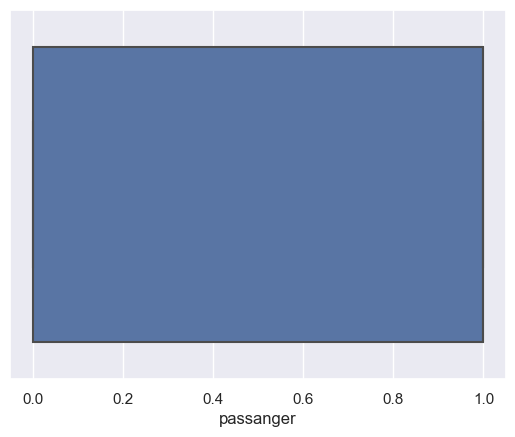

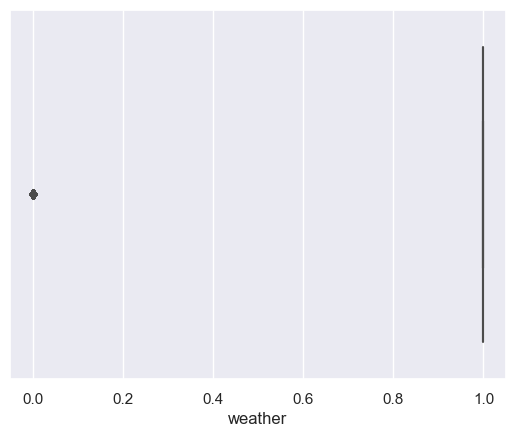

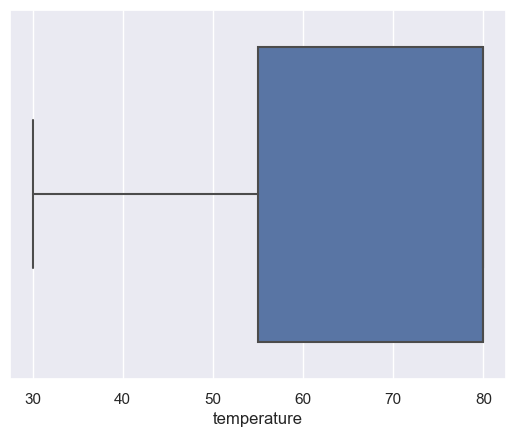

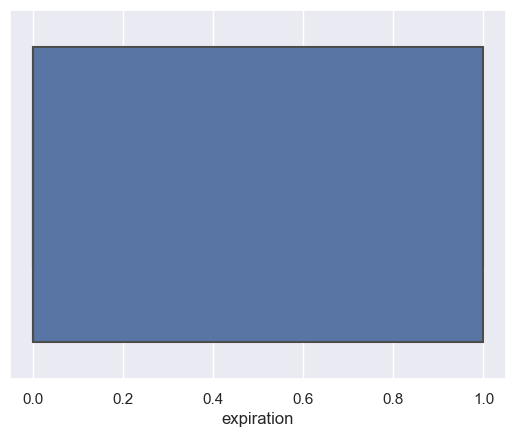

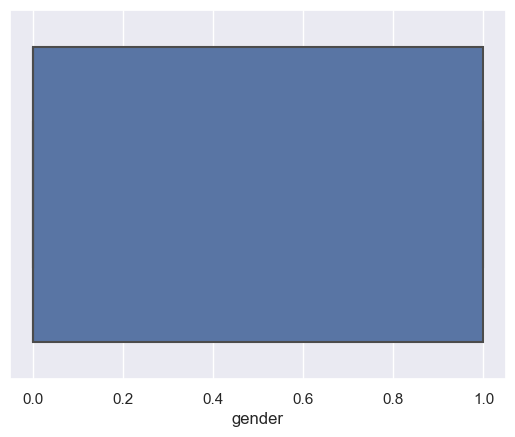

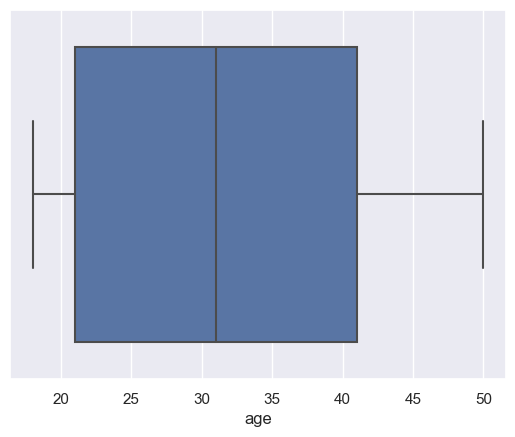

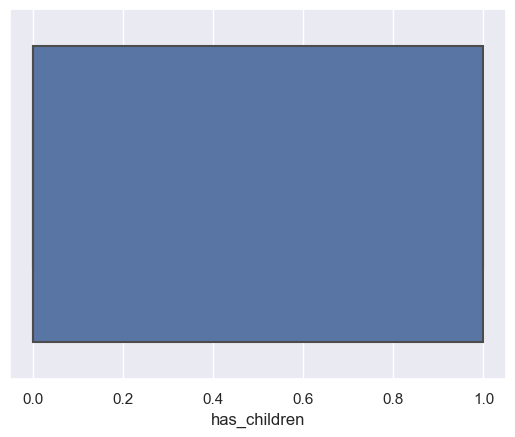

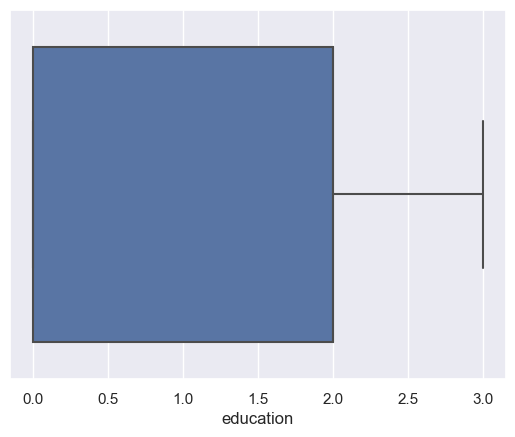

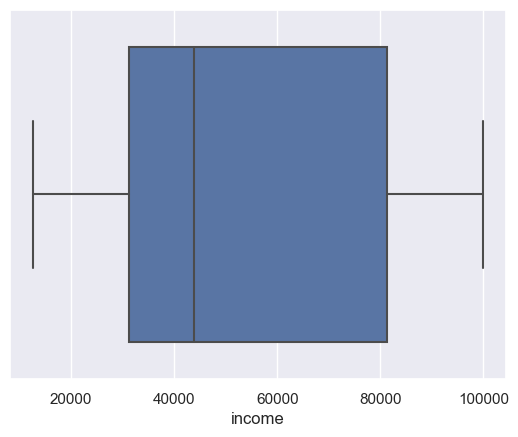

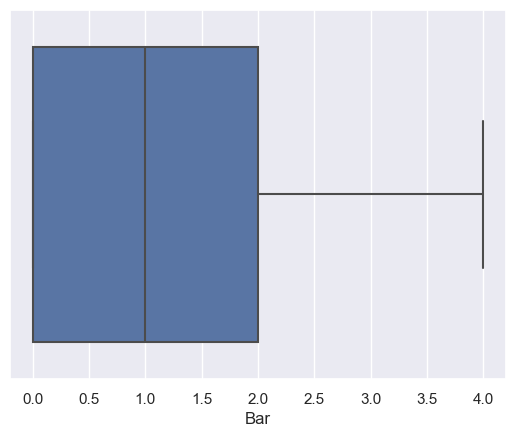

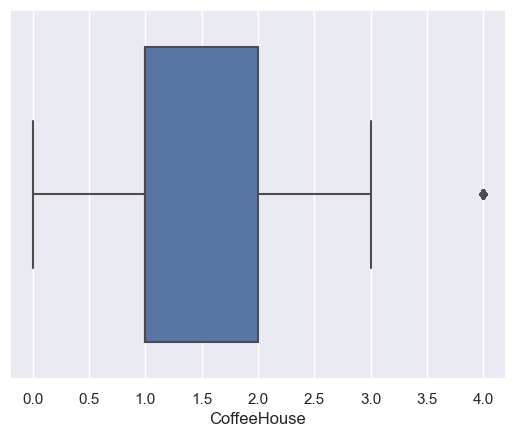

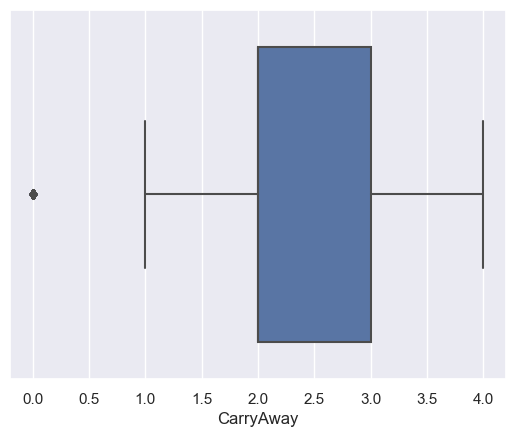

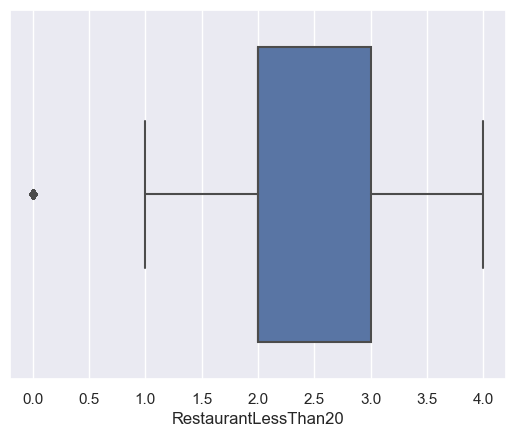

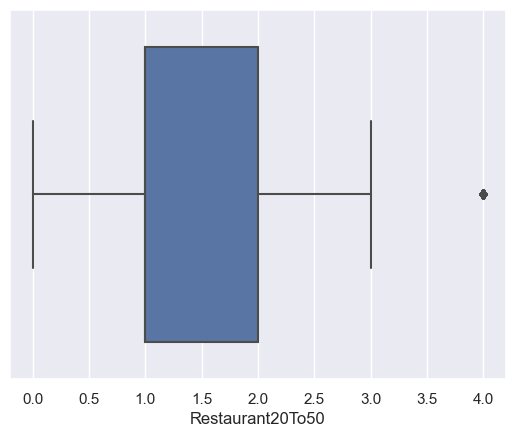

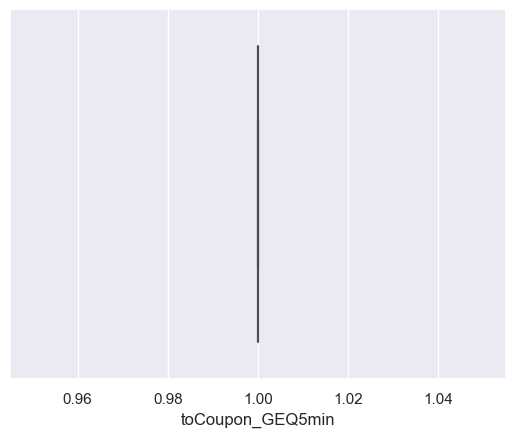

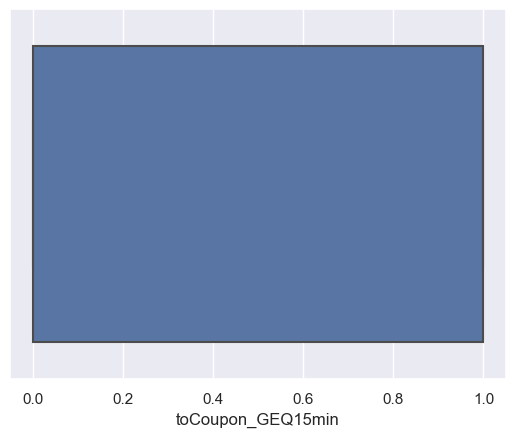

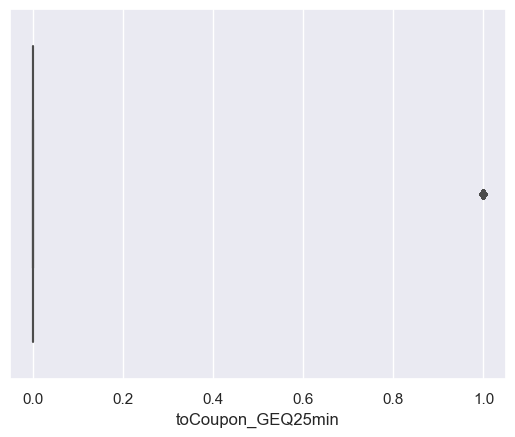

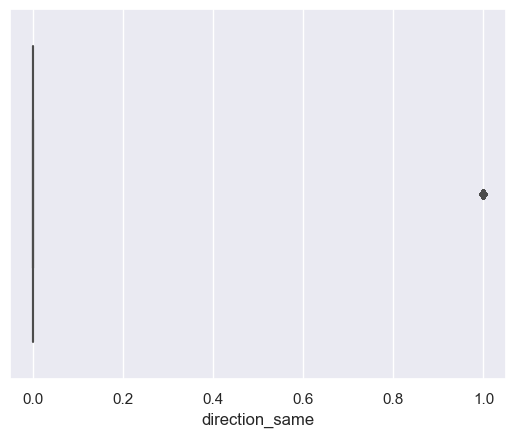

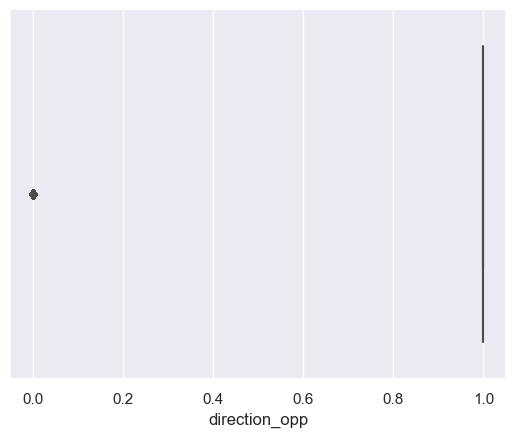

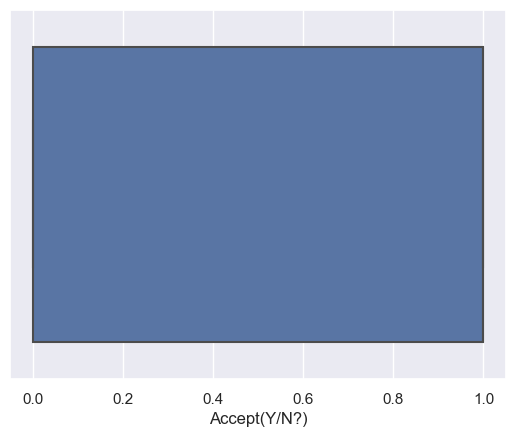

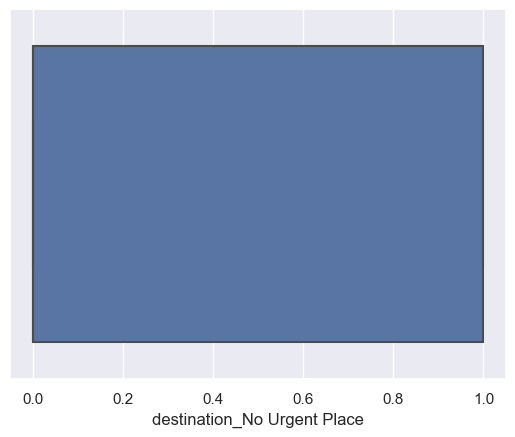

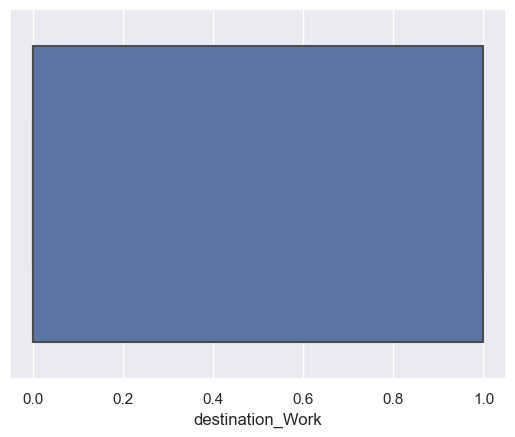

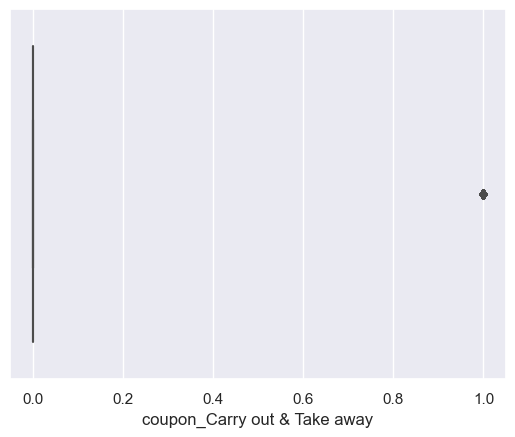

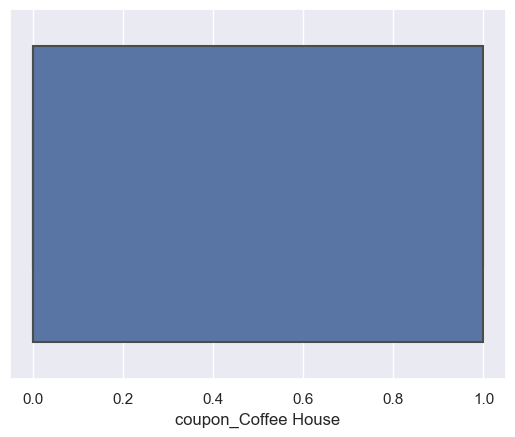

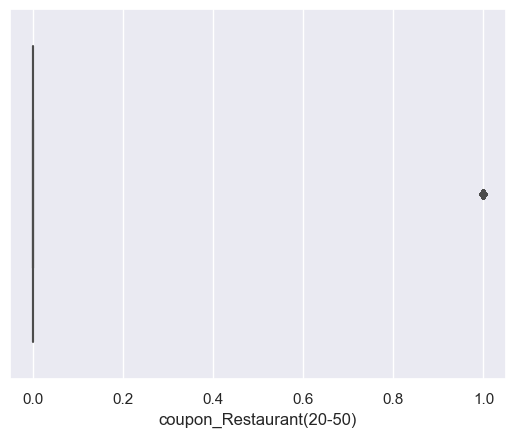

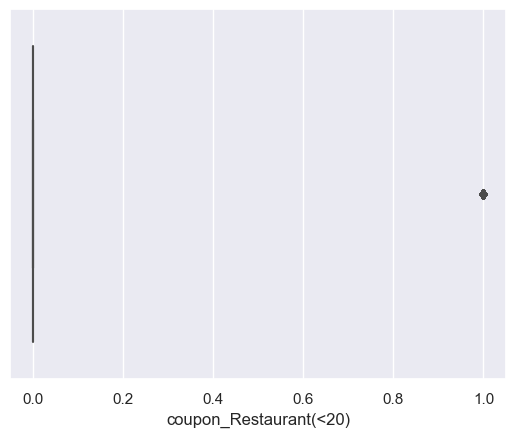

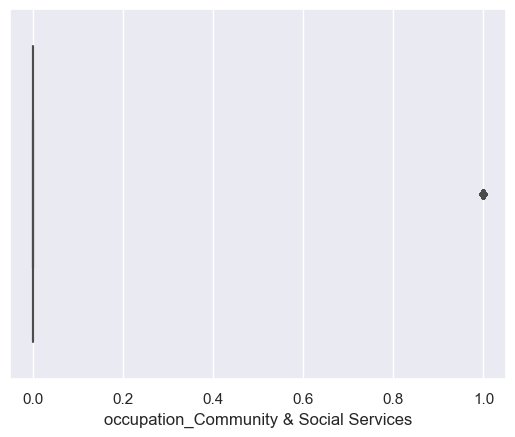

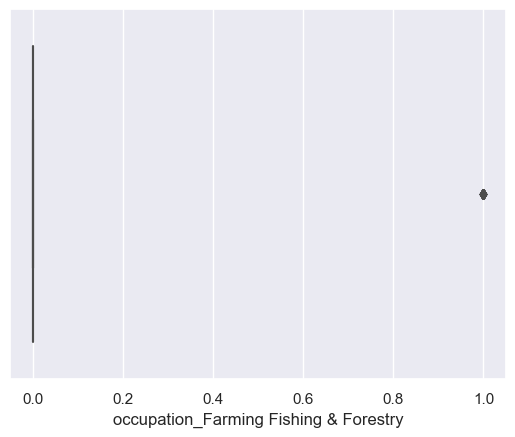

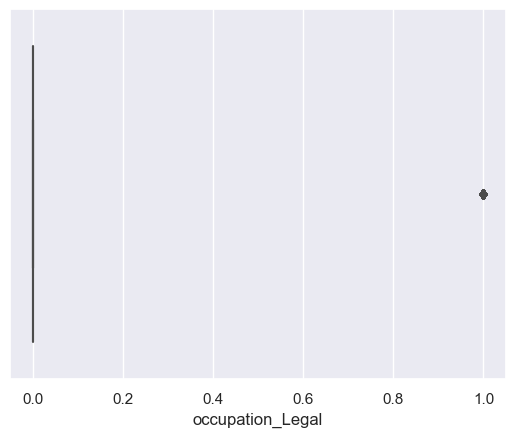

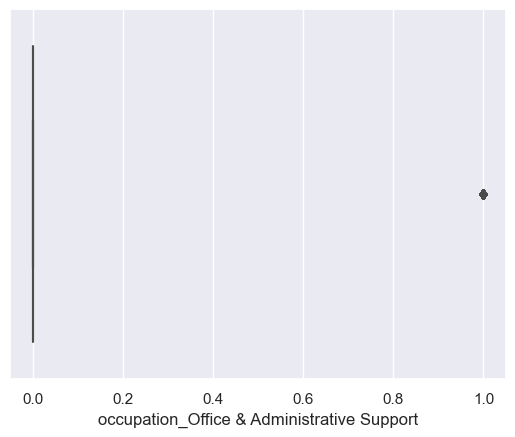

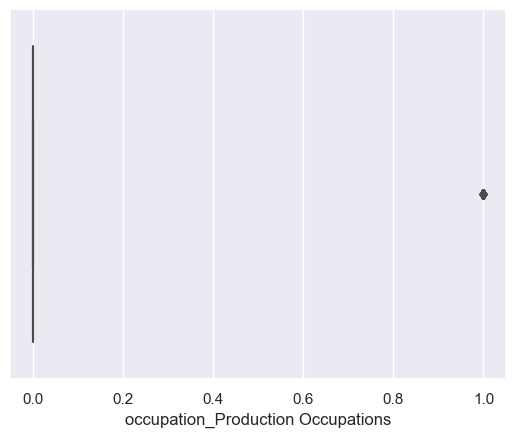

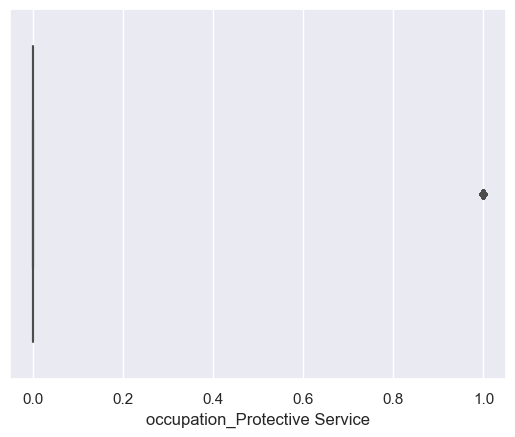

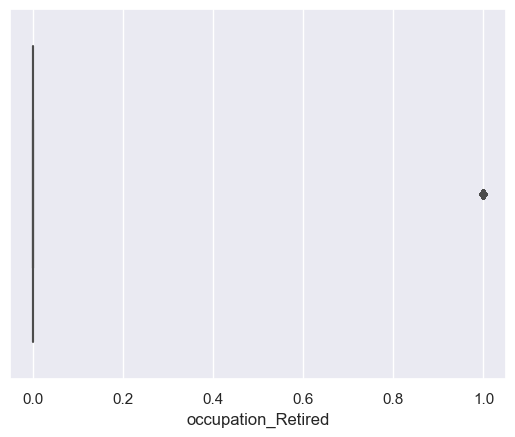

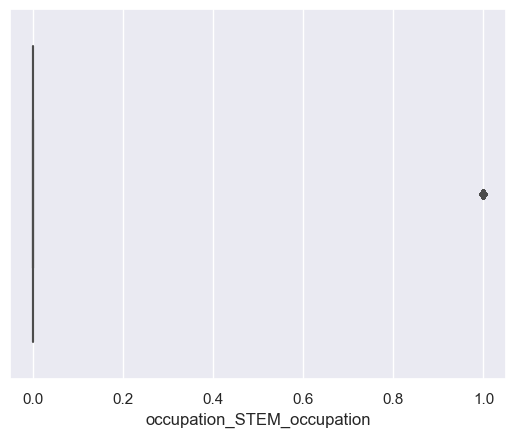

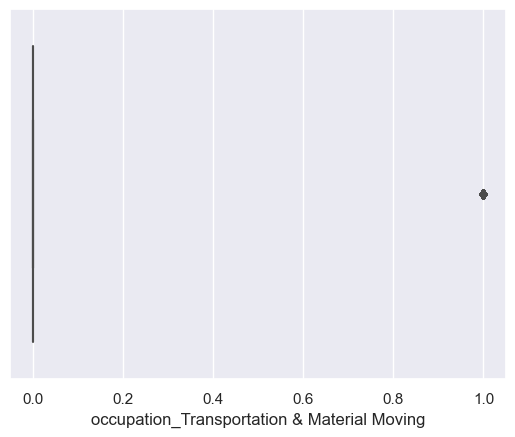

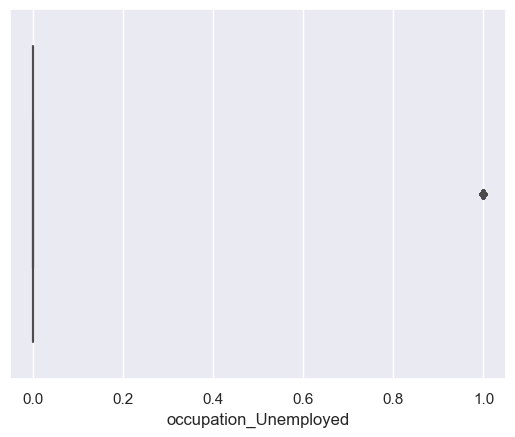

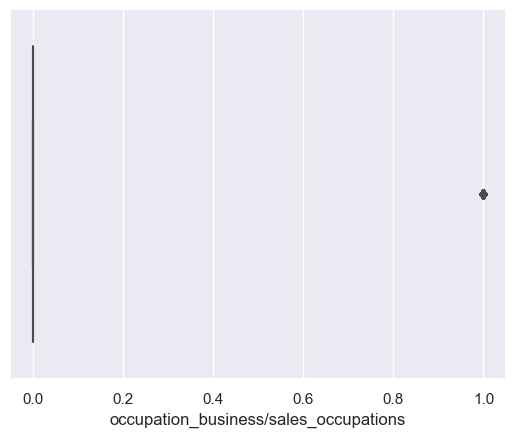

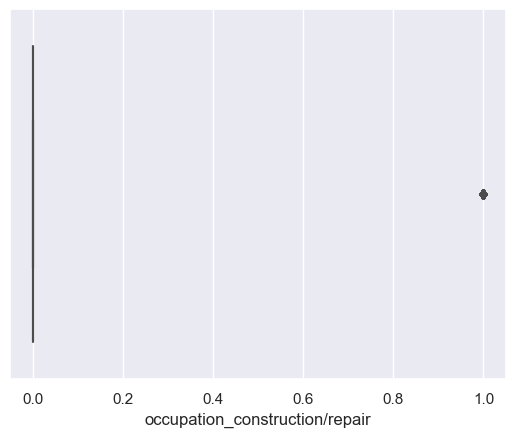

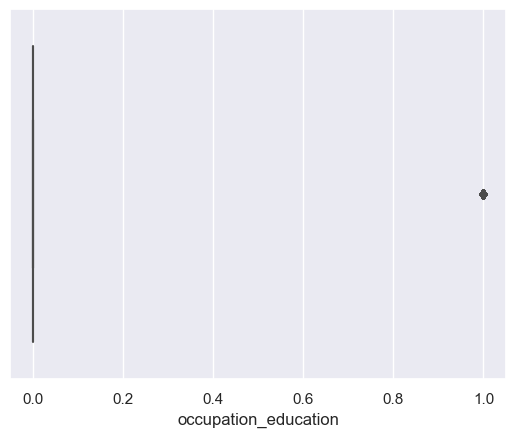

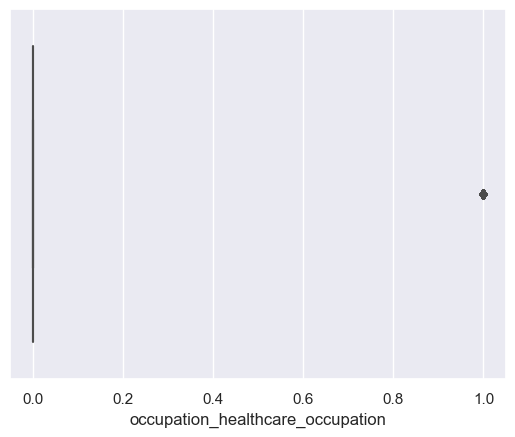

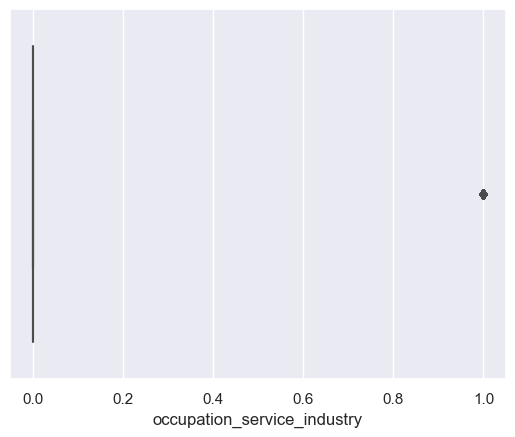

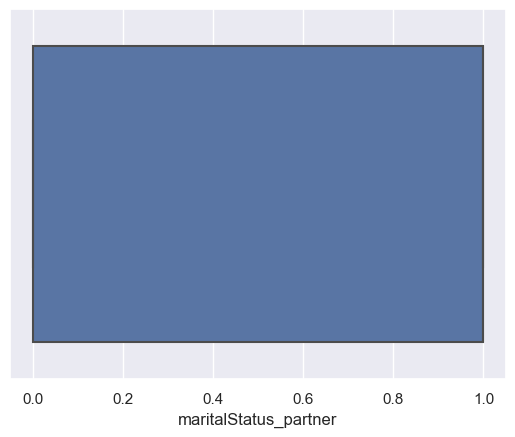

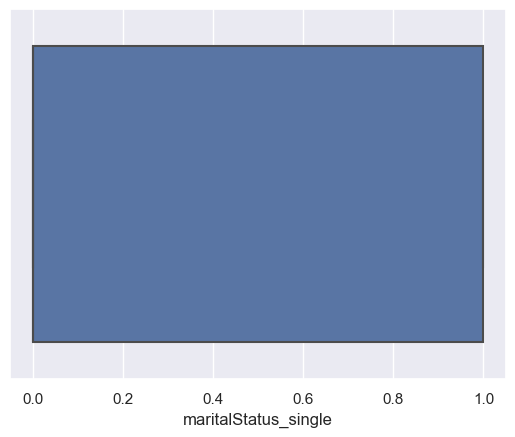

In [128]:
for i in df3.columns:
    sns.boxplot(df3[i])
    plt.show()

## ---------------------------------------------No Outliers-------------------------------------

## Checking Duplicate values again

In [48]:
df3.duplicated().sum()

195

In [49]:
print(df3.shape)
df3 = df3[~(df3.duplicated())]
print(df3.shape)

(12393, 43)
(12198, 43)


### Removing some non significant columns

In [ ]:
#Remove these colums = toCoupon_GEQ5min, direction_opp
# toCoupon_GEQ5min - Because it have only 1 value
# direction_opp - Exactly same column is present in dataset name direction_same

In [50]:
df3.drop(columns = ['toCoupon_GEQ5min', 'direction_opp'], inplace = True)

## Multicollinearity

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,5.229435
1,weather,7.526074
2,temperature,18.112305
3,expiration,1.997113
4,gender,2.426593
5,age,14.217495
6,has_children,2.679719
7,education,3.140463
8,income,5.289057
9,Bar,2.501472


In [ ]:
# Since maritalStatus_partner have the highest VIF, more than 11
# We are bound to remove this column

In [51]:
#Dropping column
print(df3.shape)
df3.drop(columns = ['maritalStatus_partner'],inplace = True)
print(df3.shape)

(12198, 41)
(12198, 40)


In [93]:
#Check again
vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,5.161224
1,weather,7.512065
2,temperature,17.877313
3,expiration,1.996255
4,gender,2.418864
5,age,14.123368
6,has_children,2.667420
7,education,3.140086
8,income,4.847678
9,Bar,2.493084


In [52]:
#dropping temperature column
print(df3.shape)
df3.drop(columns = ['temperature'],inplace = True)
print(df3.shape)

(12198, 40)
(12198, 39)


In [95]:
#Check again
vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,5.052681
1,weather,5.136489
2,expiration,1.983627
3,gender,2.418862
4,age,13.990392
5,has_children,2.666794
6,education,3.139090
7,income,4.846020
8,Bar,2.492562
9,CoffeeHouse,3.335555


In [53]:
#dropping age column
print(df3.shape)
df3.drop(columns = ['age'],inplace = True)
print(df3.shape)

(12198, 39)
(12198, 38)


In [97]:
#Check again
vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,4.893633
1,weather,5.062502
2,expiration,1.981722
3,gender,2.418254
4,has_children,2.302986
5,education,3.043725
6,income,4.774088
7,Bar,2.469772
8,CoffeeHouse,3.335551
9,CarryAway,9.614008


In [54]:
#dropping RestaurantLessThan20 column
print(df3.shape)
df3.drop(columns = ['RestaurantLessThan20'],inplace = True)
print(df3.shape)

(12198, 38)
(12198, 37)


In [99]:
#Check again
vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,4.878180
1,weather,5.027500
2,expiration,1.981486
3,gender,2.415702
4,has_children,2.298116
5,education,3.041564
6,income,4.753242
7,Bar,2.469668
8,CoffeeHouse,3.220005
9,CarryAway,8.105929


In [55]:
#dropping CarryAway column
print(df3.shape)
df3.drop(columns = ['CarryAway'],inplace = True)
print(df3.shape)

(12198, 37)
(12198, 36)


In [101]:
#Check again
vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,4.756308
1,weather,4.958572
2,expiration,1.981372
3,gender,2.413599
4,has_children,2.298068
5,education,3.032064
6,income,4.718226
7,Bar,2.433369
8,CoffeeHouse,3.097780
9,Restaurant20To50,3.608884


In [56]:
#dropping destination_No Urgent Place column
print(df3.shape)
df3.drop(columns = ['destination_No Urgent Place'],inplace = True)
print(df3.shape)

(12198, 36)
(12198, 35)


In [119]:
#Check again
vif = pd.DataFrame()
vif['Columns'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif

,Columns,VIF
0,passanger,3.932294
1,weather,4.877978
2,expiration,1.932276
3,gender,2.417223
4,has_children,2.281953
5,education,3.034395
6,income,4.624465
7,Bar,2.424800
8,CoffeeHouse,3.084990
9,Restaurant20To50,3.594866


### Checking Duplicated values again because we have removed so many columns

In [57]:
df3.duplicated().sum()

425

In [58]:
df3 = df3[~(df3.duplicated())]

In [59]:
df3.duplicated().sum()

0

In [60]:
df3.shape

(11773, 35)

# Feature Scaling

## Normalisation

In [61]:
df4 = df3.copy()

In [62]:
from sklearn.preprocessing import normalize
x = normalize(df4.drop(['Accept(Y/N?)'], axis = 1))
print(x.shape)
y = df4['Accept(Y/N?)']

(11773, 34)


In [63]:
y.shape

(11773,)

In [64]:
df_scaled = pd.DataFrame(data = x,columns = df4.drop(['Accept(Y/N?)'], axis = 1).columns)
df_scaled.reset_index(inplace = True)     
y = df4['Accept(Y/N?)'].reset_index(drop = True)
df_scaled = pd.concat([df_scaled,y],axis = 1)
df_scaled.drop(columns = 'index',inplace = True)
print(df_scaled.shape)
print(df4.shape)

(11773, 35)
(11773, 35)


In [65]:
df_scaled

,passanger,weather,expiration,gender,has_children,education,income,Bar,CoffeeHouse,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_Work,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),occupation_Community & Social Services,occupation_Farming Fishing & Forestry,occupation_Legal,occupation_Office & Administrative Support,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_STEM_occupation,occupation_Transportation & Material Moving,occupation_Unemployed,occupation_business/sales_occupations,occupation_construction/repair,occupation_education,occupation_healthcare_occupation,occupation_service_industry,maritalStatus_single,Accept(Y/N?)
0,0.000023,0.000023,0.000000,0.000000,0.000023,0.000000,1.0,0.0,0.0,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.000000,1
1,0.000000,0.000023,0.000023,0.000000,0.000023,0.000000,1.0,0.0,0.0,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.000000,0
2,0.000000,0.000023,0.000023,0.000000,0.000023,0.000000,1.0,0.0,0.0,0.000046,0.000023,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.000000,1
3,0.000000,0.000023,0.000023,0.000000,0.000023,0.000000,1.0,0.0,0.0,0.000046,0.000023,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.000000,0
4,0.000000,0.000023,0.000000,0.000000,0.000023,0.000000,1.0,0.0,0.0,0.000046,0.000023,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000023,0.000000,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11768,0.000000,0.000000,0.000000,0.000012,0.000000,0.000025,1.0,0.0,0.0,0.000025,0.000000,0.000000,0.000012,0.000000,0.000012,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000012,0.0,0.0,0.0,0.0,0.000012,1
11769,0.000012,0.000000,0.000000,0.000012,0.000000,0.000025,1.0,0.0,0.0,0.000025,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000012,0.0,0.0,0.0,0.0,0.000012,1
11770,0.000012,0.000000,0.000000,0.000012,0.000000,0.000025,1.0,0.0,0.0,0.000025,0.000000,0.000000,0.000012,0.000012,0.000000,0.000012,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000012,0.0,0.0,0.0,0.0,0.000012,0
11771,0.000012,0.000000,0.000000,0.000012,0.000000,0.000025,1.0,0.0,0.0,0.000025,0.000012,0.000012,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000012,0.0,0.0,0.0,0.0,0.000012,0


In [66]:
(y.value_counts()/y.value_counts().sum())*100

1    56.714516
0    43.285484
Name: Accept(Y/N?), dtype: float64

In [ ]:
# No Imbalanced data

## EDA

In [74]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [173]:
pf = ProfileReport(df4)
pf.to_file(output_file = 'report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [108]:
pf = ProfileReport(df_scaled)
pf.to_file(output_file = 'report2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [364]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

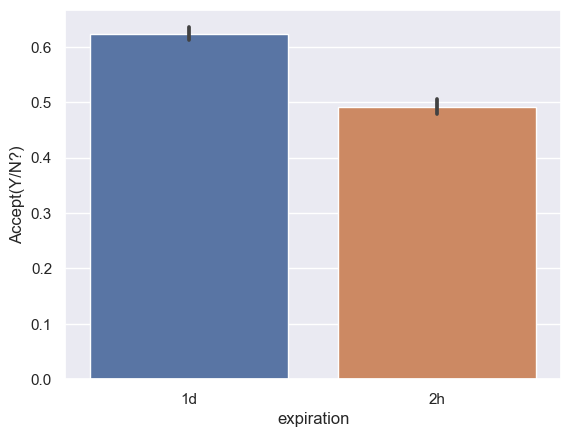

In [404]:
sns.barplot(x = df['expiration'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
# Coupon having 1 day validity seems to work more

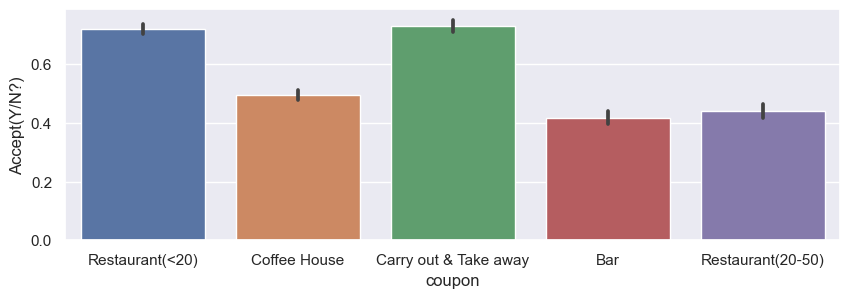

In [403]:
plt.figure(figsize = (10,3))

sns.barplot(x = df['coupon'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
#(Carry out & take away) coupon and  coupons for restraunt where user spent less than 20$ seems to work more

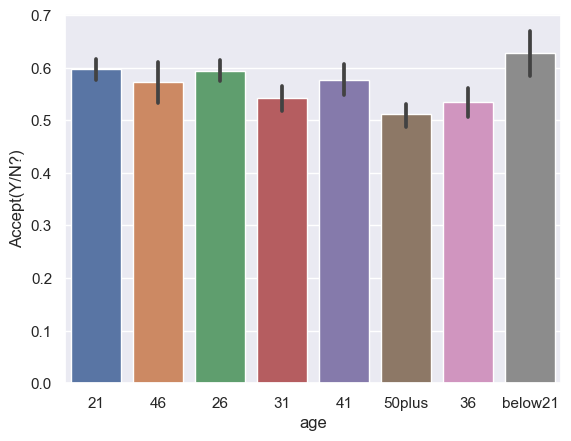

In [397]:
sns.barplot(x = df['age'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
#Customers having age segment 21 or less than 21 seems to accept the coupon more

In [411]:
copy = df1.copy()

def col(row):

    if row['toCoupon_GEQ25min'] == 1:
        return "25 min away"
    elif row['toCoupon_GEQ15min'] == 1:
        return "15 min away"
    else:
        return "No Distance Covered"

copy['new_column'] = copy.apply(lambda row: col(row), axis=1)

In [412]:
copy.to_csv('dataset.csv')

In [406]:
copy['new_column'].value_counts()

15 min away            5522
No Distance Covered    5408
25 min away            1463
Name: new_column, dtype: int64

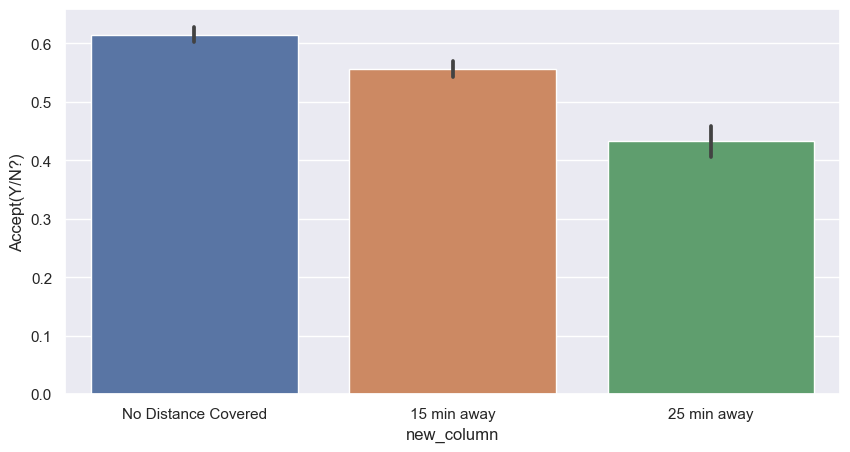

In [407]:
plt.figure(figsize = (10,5))

sns.barplot(x = copy['new_column'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
#More the driving distance to the restaurant, less likely the people might be accepting the coupon

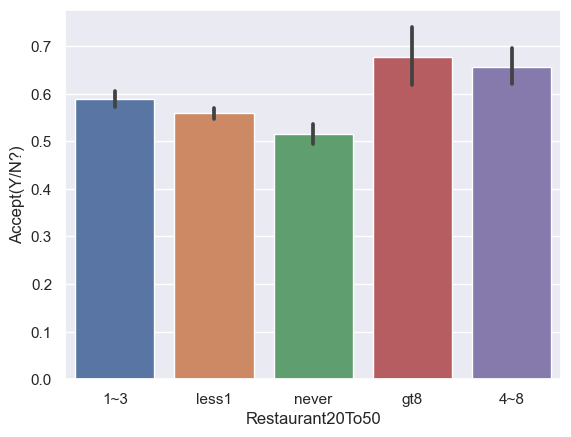

In [369]:
sns.barplot(x = df1['Restaurant20To50'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
# If people are more frequent to the restraunt, they are more likely to accept the coupon

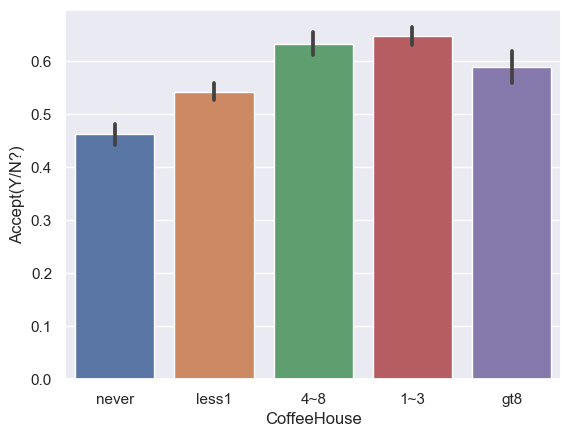

In [366]:
sns.barplot(x = df1['CoffeeHouse'],y = df4['Accept(Y/N?)'])
plt.show()

In [408]:
# If people are more frequent to the restraunt, they are more likely to accept the coupon

#That is not the case with CoffeeHouse

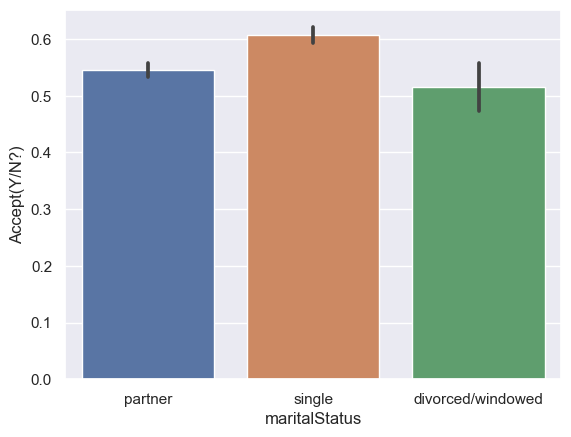

In [365]:
sns.barplot(x = df1['maritalStatus'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
    # Mostly Single people are more likely to accept the coupon

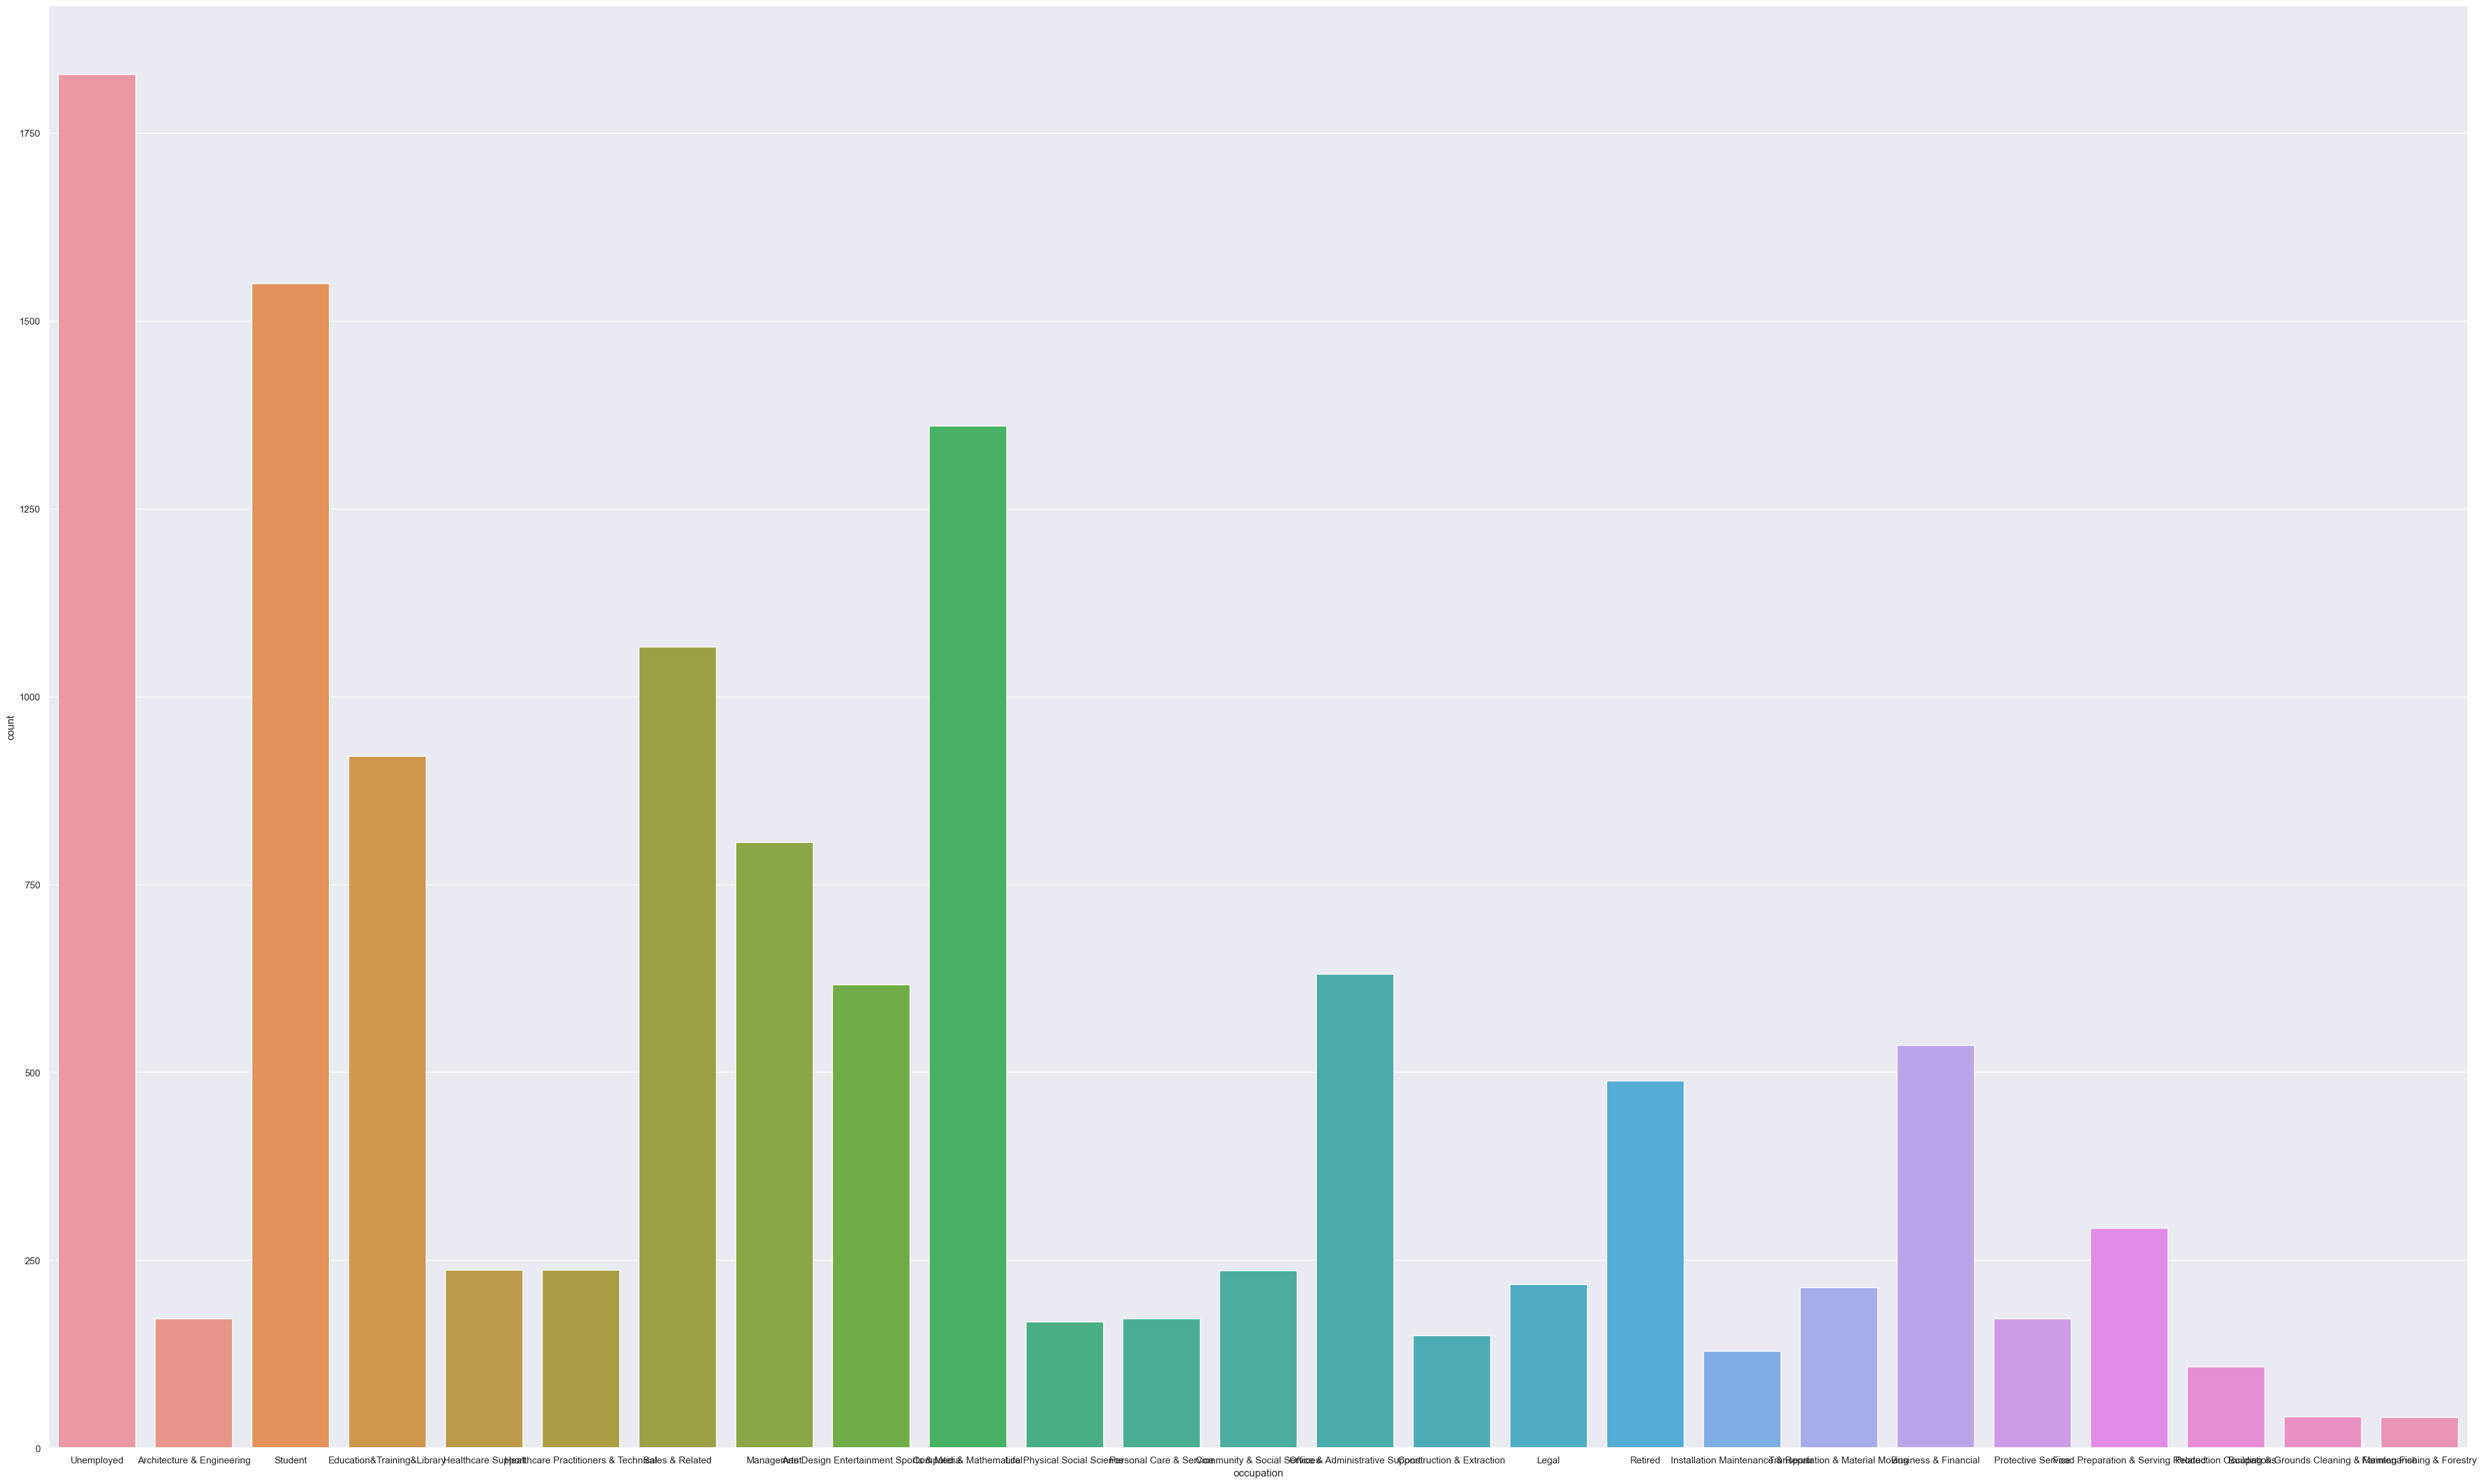

In [363]:
plt.figure(figsize = (50,30))

sns.countplot(x = df['occupation'])
plt.show()

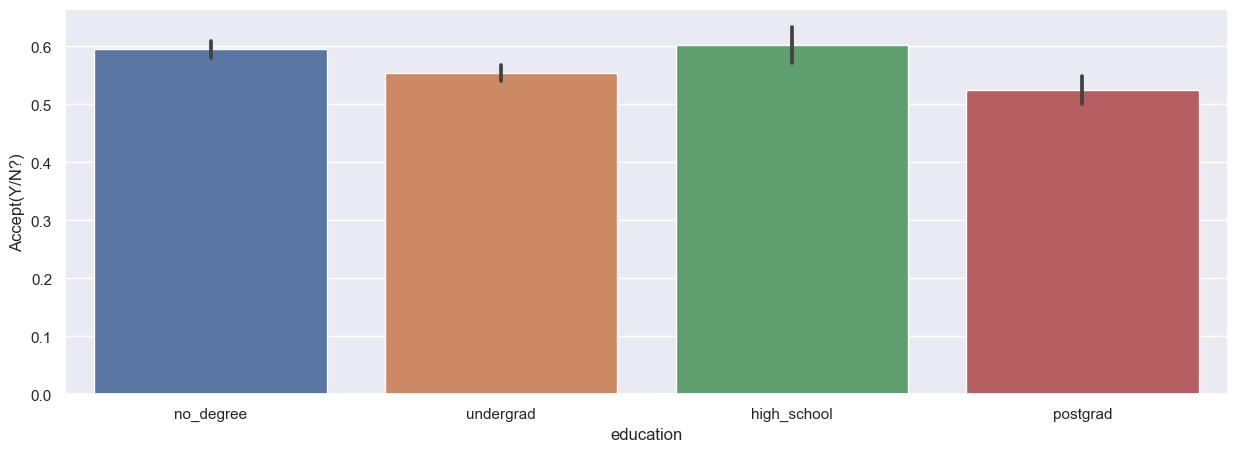

In [352]:
plt.figure(figsize = (15,5))

sns.barplot(x = df1['education'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
#Mostly people with less educational background are likely to accept the coupon

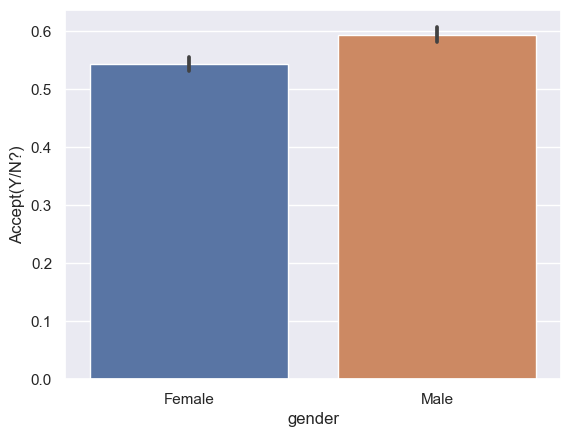

In [343]:
sns.barplot(x = df['gender'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
#Male prefer the coupon more than female

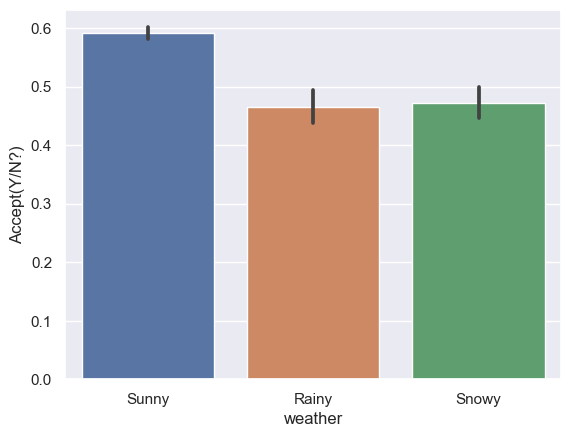

In [342]:
sns.barplot(x = df['weather'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
# People generally accept the coupon in sunny weather

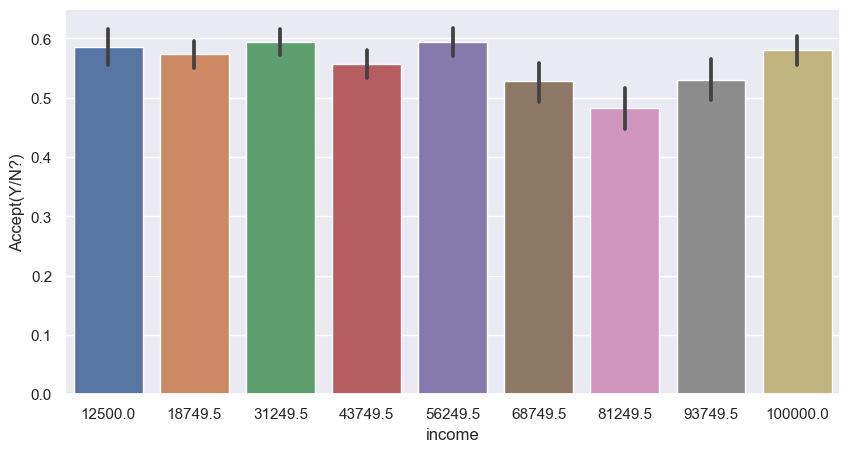

In [334]:
plt.figure(figsize = (10,5))
sns.barplot(x = df4['income'],y = df4['Accept(Y/N?)'])
plt.show()

In [ ]:
#Every kind of income group can accept the coupon as there is no segregation found

In [67]:
#Key Points

In [ ]:
# Coupon having 1 day validity seems to work more
#(Carry out & take away) coupon and  coupons for restraunt where user spent less than 20$ seems to work more
#Customers having age segment 21 or less than 21 seems to accept the coupon more
#More the driving distance to the restaurant, less likely the people might be accepting the coupon
# If people are more frequent to the restraunt, they are more likely to accept the coupon
# If people are more frequent to the restraunt, they are more likely to accept the coupon
#That is not the case with CoffeeHouse
# Mostly Single people are more likely to accept the coupon
#Mostly people with less educational background are likely to accept the coupon
#Male prefer the coupon more than female
# People generally accept the coupon in sunny weather
#Every kind of income group can accept the coupon as there is no segregation found


## Model Building

In [221]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(df_scaled.drop(columns = ['Accept(Y/N?)']),df_scaled['Accept(Y/N?)'],test_size = 0.2)
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(9418, 34)
(9418,)
(2355, 34)
(2355,)


In [295]:
from sklearn.metrics import accuracy_score
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
md1 = lr.fit(xTrain,yTrain)
pred1 = md1.predict(xTest)
acc1 = accuracy_score(pred1,yTest)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
md2 = dt.fit(xTrain,yTrain)
pred2 = md2.predict(xTest)
acc2 = accuracy_score(pred2,yTest)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
md4 = bg.fit(xTrain,yTrain)
pred4 = md4.predict(xTest)
acc4 = accuracy_score(pred4,yTest)

#SVM
from sklearn.svm import SVC

svm = SVC()
md5 = svm.fit(xTrain,yTrain)
pred5 = md5.predict(xTest)
acc5 = accuracy_score(pred5,yTest)

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
md6 = knn.fit(xTrain,yTrain)
pred6 = md6.predict(xTest)
acc6 = accuracy_score(pred6,yTest)


#BernouliNB
from sklearn.naive_bayes import GaussianNB, BernoulliNB
bnb = BernoulliNB(alpha = 5,fit_prior = False)
md7 = bnb.fit(xTrain,yTrain)
pred7 = bnb.predict(xTest)
acc7 = accuracy_score(pred7,yTest)


# Voting Classifier
from sklearn.ensemble import VotingClassifier


vc = VotingClassifier(estimators = [('lr',lr),('dt',dt),('rf',rf),('bg',bg),('svm',svm),('knn',knn),('bnb',bnb)])
md8 = vc.fit(xTrain,yTrain)
pred8 = md8.predict(xTest)
acc8 = accuracy_score(pred8,yTest)


In [296]:
#Train score
ac1 = accuracy_score(md1.predict(xTrain),yTrain)
ac2 = accuracy_score(md2.predict(xTrain),yTrain)
ac3 = accuracy_score(md3.predict(xTrain),yTrain)
ac4 = accuracy_score(md4.predict(xTrain),yTrain)
ac5 = accuracy_score(md5.predict(xTrain),yTrain)
ac6 = accuracy_score(md6.predict(xTrain),yTrain)
ac7 = accuracy_score(md7.predict(xTrain),yTrain)
ac8 = accuracy_score(md8.predict(xTrain),yTrain)


In [297]:
l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.564026,0.579618
Decision Tree,0.979401,0.656900
Random Forest Classifier,0.979401,0.715499
Bagging Classifier,0.965385,0.695541
SVM,0.564026,0.579618
KNN,0.797940,0.698938
BernouliNB,0.650669,0.659873
Voting Classifier,0.921321,0.719745


## Overfitting Problem with the model - Lets try pre pruning as well as post pruning

In [ ]:
#GridSearchCV

In [286]:
param1 = ({'n_estimators': [20],'criterion': ['gini', "entropy"],'max_depth': [20],'max_leaf_nodes' : list(range(5,100,10))})
from sklearn.model_selection import GridSearchCV
#param1 = ({'n_estimators': [10,20,30],'criterion': ['gini', "entropy"],'max_depth': [50,100]})
gv = GridSearchCV(RandomForestClassifier(),param_grid = param1,cv = 4,verbose=True)
gv.fit(xTrain,yTrain)
print('Best Estimators\n', gv.best_estimator_)
print('Best score\n', gv.best_score_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best Estimators
 RandomForestClassifier(max_depth=20, max_leaf_nodes=95, n_estimators=20)
Best score
 0.6952633363818553


In [ ]:
#RandomForest

In [307]:
rf = RandomForestClassifier(max_depth=20 ,n_estimators=20,max_leaf_nodes = 79,criterion = 'entropy')
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)
print('Test score: ',acc3)
print('####'*5)
print('Train score',accuracy_score(md3.predict(xTrain),yTrain))

Test score:  0.7057324840764331
####################
Train score 0.7305160331280527


In [308]:
#KNN

In [309]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
md6 = knn.fit(xTrain,yTrain)
pred6 = md6.predict(xTest)
acc6 = accuracy_score(pred6,yTest)
print('Test score: ',acc6)
print('####'*5)
print('Train score',accuracy_score(md6.predict(xTrain),yTrain))

Test score:  0.7044585987261146
####################
Train score 0.7328519855595668


In [303]:
#Checking confusion matrix for bith the models

In [319]:
#Random Forest
from sklearn.metrics import confusion_matrix
train_pred = md3.predict(xTrain)
print('Random Forest\n')
print('Test Score\n',confusion_matrix(pred3,yTest))
print('Train Score\n',confusion_matrix(train_pred,yTrain))

Random Forest

Test Score
 [[ 546  249]
 [ 444 1116]]
Train Score
 [[2427  859]
 [1679 4453]]


In [320]:
from sklearn.metrics import confusion_matrix
train_pred = md6.predict(xTrain)
print('KNN\n')

print('Test Score\n',confusion_matrix(pred6,yTest))
print('Train Score\n',confusion_matrix(train_pred,yTrain))

KNN

Test Score
 [[ 558  264]
 [ 432 1101]]
Train Score
 [[2490  900]
 [1616 4412]]


In [322]:
from sklearn.metrics import classification_report
train_pred = md6.predict(xTrain)
print('KNN\n')

print('Test Score\n',classification_report(pred6,yTest))
print('Train Score\n',classification_report(train_pred,yTrain))

KNN

Test Score
               precision    recall  f1-score   support

           0       0.56      0.68      0.62       822
           1       0.81      0.72      0.76      1533

    accuracy                           0.70      2355
   macro avg       0.69      0.70      0.69      2355
weighted avg       0.72      0.70      0.71      2355

Train Score
               precision    recall  f1-score   support

           0       0.61      0.73      0.66      3390
           1       0.83      0.73      0.78      6028

    accuracy                           0.73      9418
   macro avg       0.72      0.73      0.72      9418
weighted avg       0.75      0.73      0.74      9418



In [323]:
#Random Forest
from sklearn.metrics import classification_report
train_pred = md3.predict(xTrain)
print('Random Forest\n')
print('Test Score\n',classification_report(pred3,yTest))
print('Train Score\n',classification_report(train_pred,yTrain))


Random Forest

Test Score
               precision    recall  f1-score   support

           0       0.55      0.69      0.61       795
           1       0.82      0.72      0.76      1560

    accuracy                           0.71      2355
   macro avg       0.68      0.70      0.69      2355
weighted avg       0.73      0.71      0.71      2355

Train Score
               precision    recall  f1-score   support

           0       0.59      0.74      0.66      3286
           1       0.84      0.73      0.78      6132

    accuracy                           0.73      9418
   macro avg       0.71      0.73      0.72      9418
weighted avg       0.75      0.73      0.74      9418



In [9]:
x = 983298329
str(x)[::-1]

'923892389'

In [7]:
(x)
    

983298329